In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 16

Import gap data (from DiagHam) and join with band geometry data (from BandGeometry.m)


In [61]:
quartic_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/quartic-data-july/outfile.csv",
                        usecols=['UCarea','t2','gap'])
mixed_aniso_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/aniso-quartic-data/outfile.csv",
                        usecols=['UCarea','t2','gap'])
aniso_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/anisotropy-data/outfile-aniso.csv",
                        usecols=['UCarea','aniso','gap'])
rsquared_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/rsquared-data/outfile-rsquared.csv",
                        usecols=['UCarea','t2','gap'])
rsquared_aniso_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/rsquared-aniso/outfile-rsquared-aniso.csv",
                        usecols=['UCarea','aniso','gap'])
rsquared_mixed_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/rsquared-mixed-order/outfile-mixed.csv",
                        usecols=['UCarea','t2','gap'])
quartic_geom_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/quartic-geometry-data.csv")
mixed_geom_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/mixed-aniso-geometry-data.csv")
quartic_geom_df = quartic_geom_df.append(pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/quartic-geometry-data-96.csv"))



quartic_full_df = pd.merge(quartic_df,quartic_geom_df,on=['UCarea','t2'])
quartic_full_df=quartic_full_df.append(pd.merge(pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/quartic-96-data/outfile96.csv"),
       pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/quartic-geometry-data-96.csv"),
       on=['UCarea','t2']))
mixed_aniso_full_df = pd.merge(mixed_aniso_df,mixed_geom_df,on=['UCarea','t2'])
rsquared_full_df = pd.merge(rsquared_df,quartic_geom_df,on=['UCarea','t2'])
rsquared_mixed_full_df = pd.merge(rsquared_mixed_df,mixed_geom_df,on=['UCarea','t2'])

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(-1e-13, 1e-13)

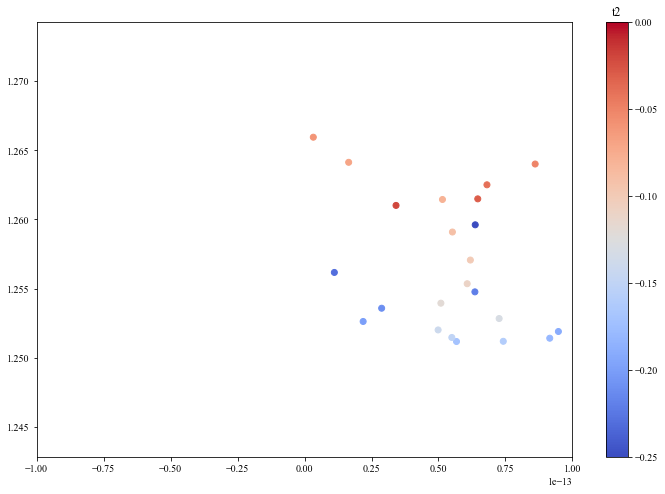

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['rmsB'],
            mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['gap'],
            c=mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.coolwarm)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlim(-1e-13,1e-13)

Text(0.5,1,'t2')

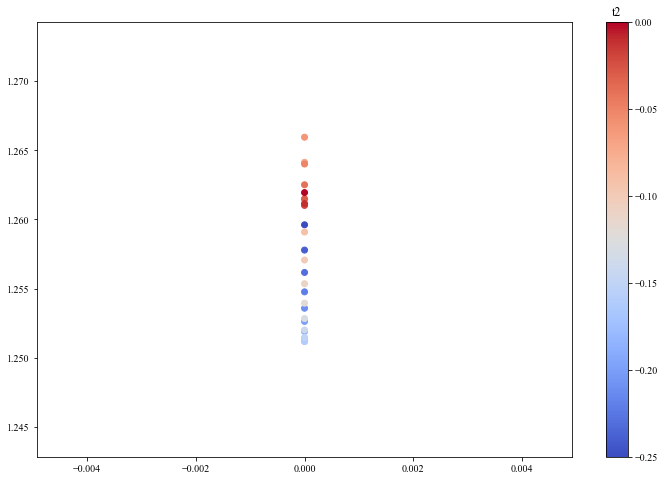

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['rmsTrace'],
            mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['gap'],
            c=mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.coolwarm)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
#plt.xlim(-1e-14,2e-14)

Gap vs. RMS Berry, Quartic model, $\phi$=1/24
----

Text(0.5,1,'t2')

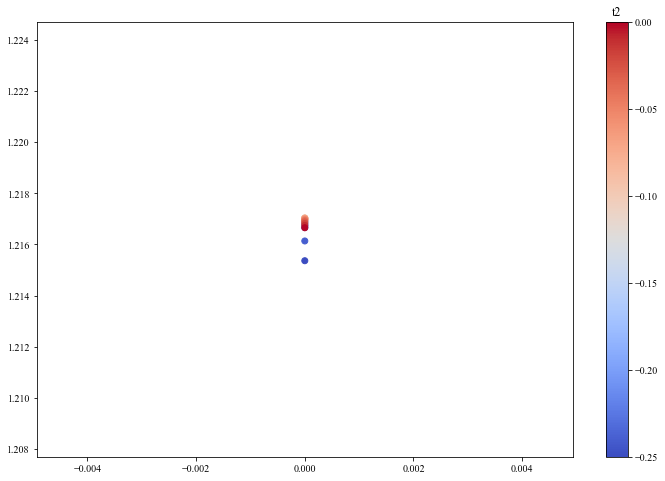

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(quartic_full_df.loc[quartic_df['UCarea']==24]['rmsB'],
            quartic_full_df.loc[quartic_df['UCarea']==24]['gap'],
            c=quartic_full_df.loc[quartic_df['UCarea']==24]['t2'],
           cmap=plt.cm.coolwarm)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
#plt.xlim(-1e-14,1e-14)
#plt.ylim(1.215,1.21705)

Gap vs. trace inequality, Quartic model, $\phi$=1/24
----

(1.215, 1.2171)

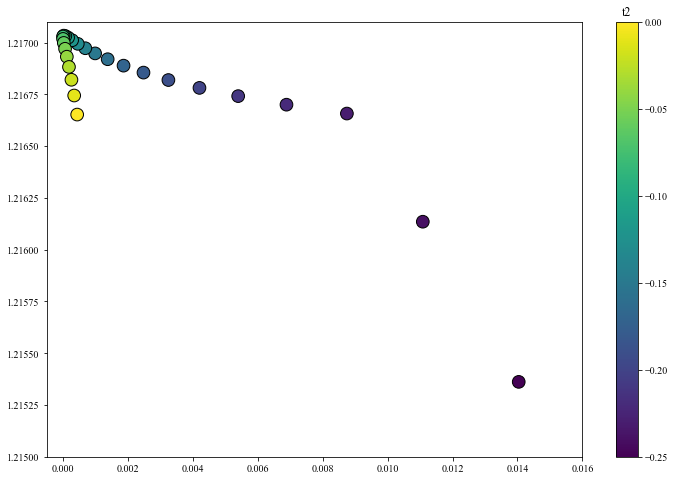

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==24]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==24]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==24]['t2'],
           cmap=plt.cm.viridis,edgecolor='black',s=160)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlim(-0.0005,0.016)
plt.ylim(1.215,1.2171)

(1.26175, 1.26285)

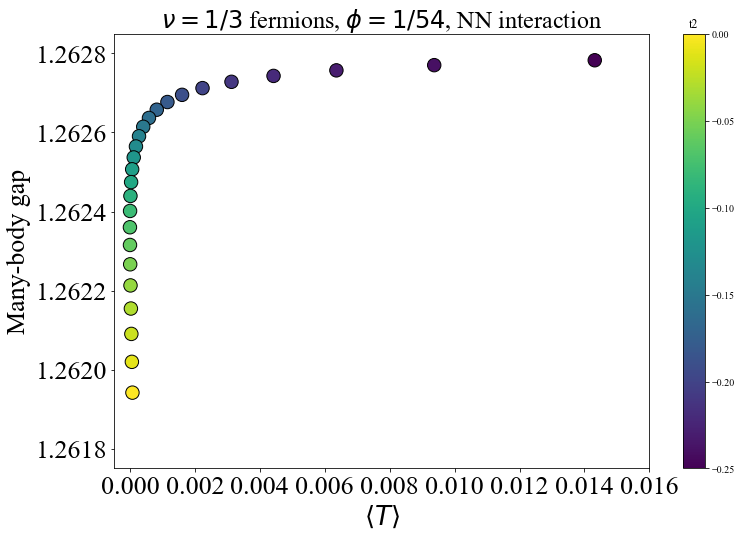

In [56]:
plt.figure(figsize=(12,8))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==54]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==54]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.viridis, edgecolor='black', s=180)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/54$, NN interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.xlim(-0.0005,0.016)
plt.ylim(1.26175,1.26285)

(-0.0005, 0.016)

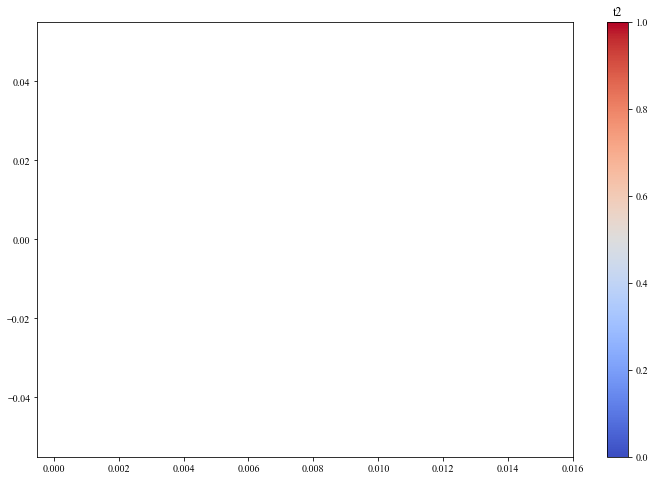

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==96]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==96]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==96]['t2'],
           cmap=plt.cm.coolwarm)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlim(-0.0005,0.016)
#plt.ylim(1.26175,1.2628)

Text(0.5,1,'t2')

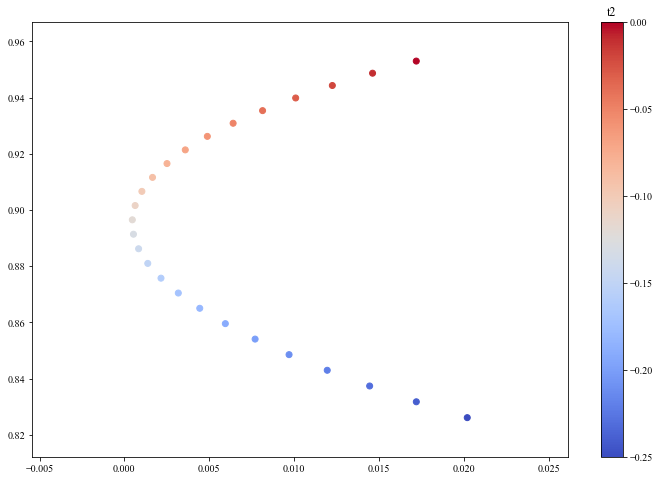

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==6]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==6]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==6]['t2'],
           cmap=plt.cm.coolwarm)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
#plt.xlim(-0.0005,0.016)
#plt.ylim(1.215,1.21705)

Text(0.5,1,'t2')

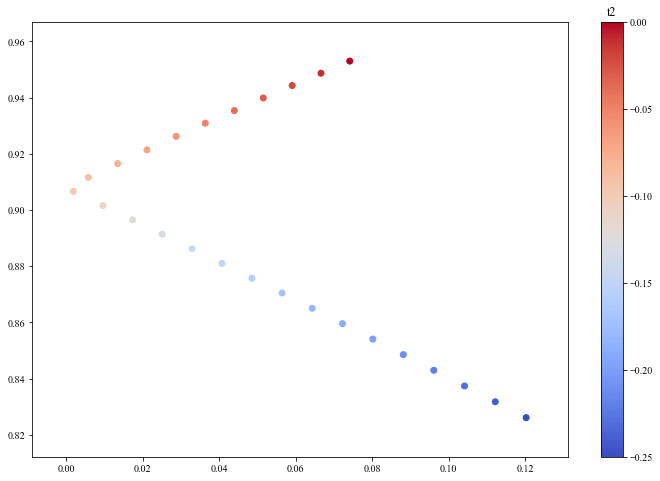

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==6]['rmsB'],
            quartic_full_df.loc[quartic_full_df['UCarea']==6]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==6]['t2'],
           cmap=plt.cm.coolwarm)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
#plt.xlim(-0.0005,0.016)

Gap vs. trace inequality, Mixed-order anisotropic model, $\phi$=1/54
----

(1.25, 1.2675)

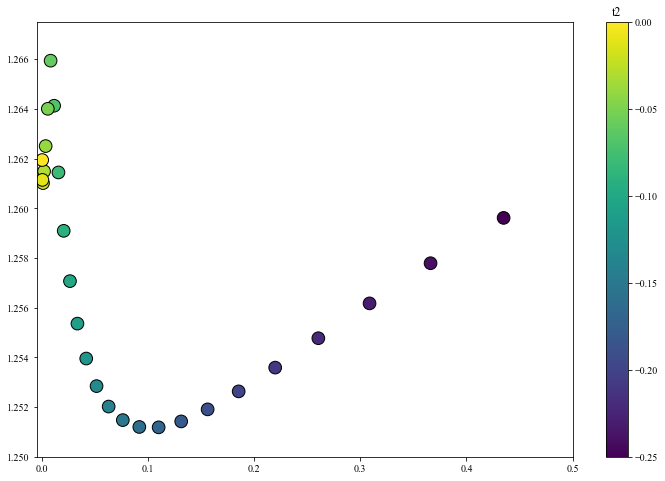

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['traceIneq'],
            mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['gap'],
            c=mixed_aniso_full_df.loc[mixed_aniso_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.viridis, edgecolor='black', s=160)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlim(-0.005,0.5)
plt.ylim(1.25,1.2675)

In [13]:
quartic_full_df.shape

(78, 7)

(1.2778, 1.2786)

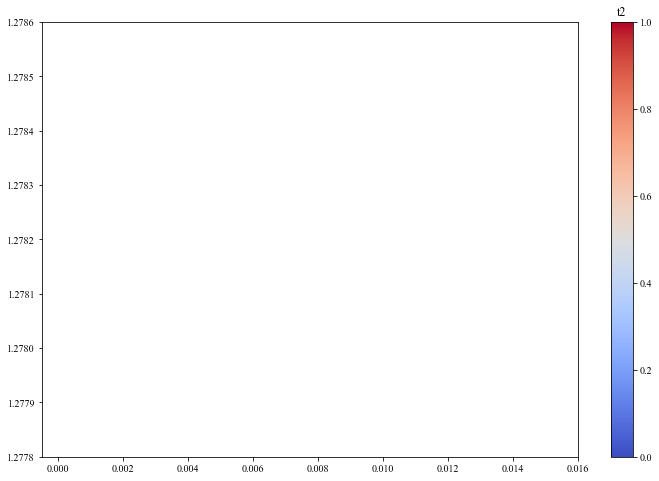

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(quartic_full_df.loc[quartic_full_df['UCarea']==96]['traceIneq'],
            quartic_full_df.loc[quartic_full_df['UCarea']==96]['gap'],
            c=quartic_full_df.loc[quartic_full_df['UCarea']==96]['t2'],
           cmap=plt.cm.coolwarm)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlim(-0.0005,0.016)
plt.ylim(1.2778,1.2786)

In [15]:
quartic_boson_df = pd.read_csv("/Users/dbauer/Physics/DiagHam/FTI/src/Programs/FCI/quartic-bosons/outfile-boson-new.csv",
                        usecols=['UCarea','t2','gap'])

In [16]:
quartic_boson_geom_df = pd.read_csv("/Users/dbauer/Dropbox/quartic/June 2018/Many-body code/quartic-boson-geometry.csv")

In [17]:
boson_full_df = pd.merge(quartic_boson_df,quartic_boson_geom_df,on=['UCarea','t2'])

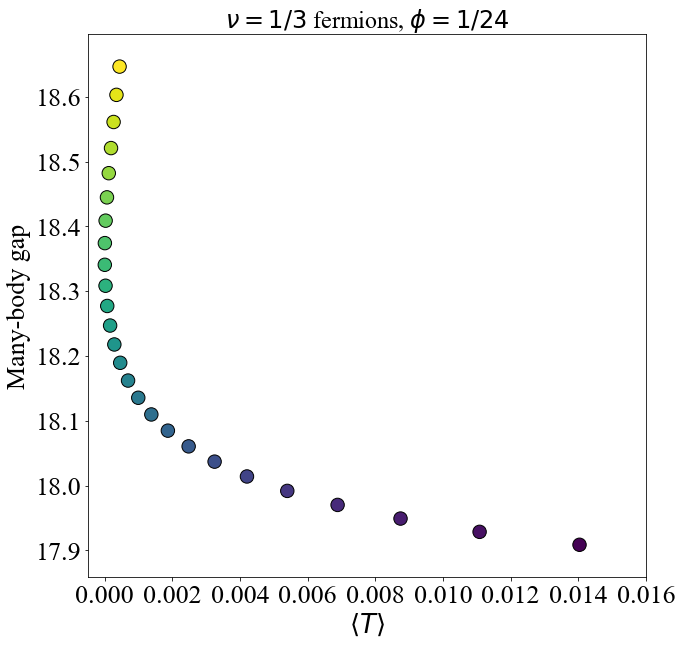

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['traceIneq'],
            rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['gap'],
            c=rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
#cbar=plt.colorbar()
#cbar.ax.set_title(r"$t_2$")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/24$",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-fermions-24-exponential.pdf",
            pad_inches=0,
            bbox_inches='tight')
#plt.ylim(1.215,1.2171)

(0.61578, 0.61603)

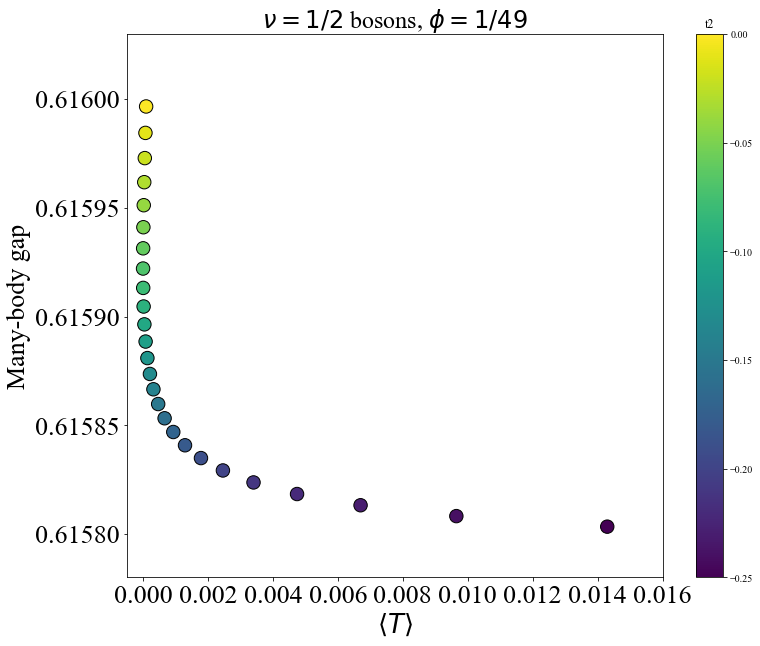

In [53]:
plt.figure(figsize=(12, 10))
plt.scatter(boson_full_df.loc[boson_full_df['UCarea']==49]['traceIneq'],
            boson_full_df.loc[boson_full_df['UCarea']==49]['gap'],
            c=boson_full_df.loc[boson_full_df['UCarea']==49]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/2$ bosons, $\phi=1/49$",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.61578,0.61603)

(0.61593, 0.61605)

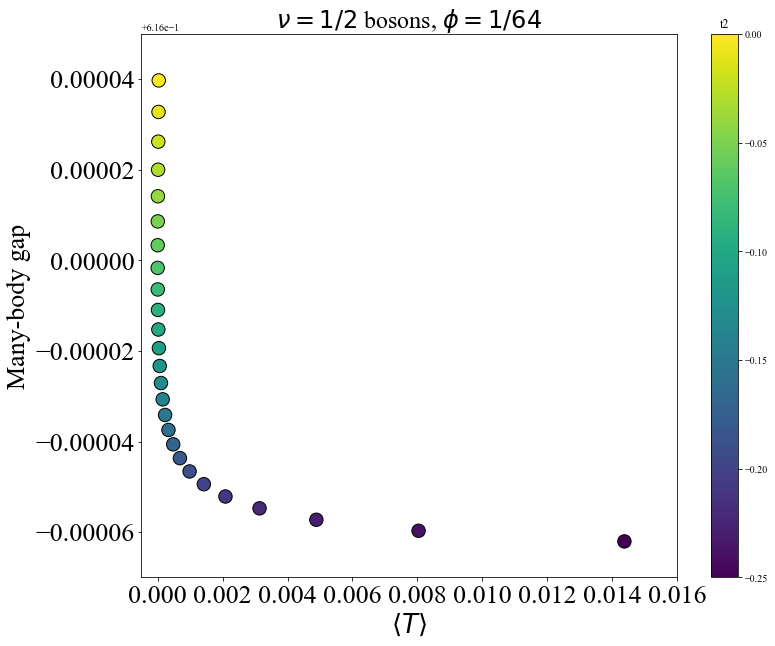

In [36]:
plt.figure(figsize=(12,10))
plt.scatter(boson_full_df.loc[boson_full_df['UCarea']==81]['traceIneq'],
            boson_full_df.loc[boson_full_df['UCarea']==81]['gap'],
            c=boson_full_df.loc[boson_full_df['UCarea']==81]['t2'],
           cmap=plt.cm.viridis,edgecolor='black',s=180)
cbar=plt.colorbar()
cbar.ax.set_title("t2")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/2$ bosons, $\phi=1/64$",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.61593,0.61605)

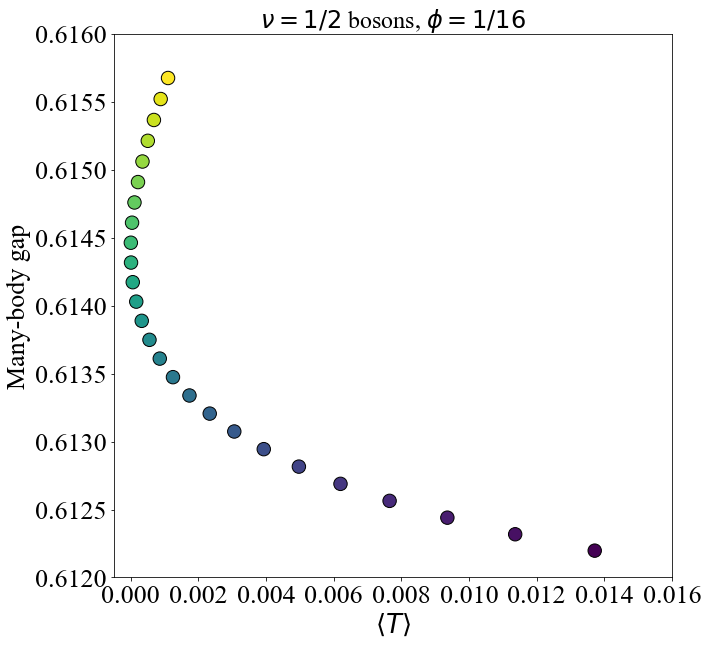

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(boson_full_df.loc[boson_full_df['UCarea']==16]['traceIneq'],
            boson_full_df.loc[boson_full_df['UCarea']==16]['gap'],
            c=boson_full_df.loc[boson_full_df['UCarea']==16]['t2'],
           cmap=plt.cm.viridis, edgecolor='black', s=180)
#cbar=plt.colorbar()
#cbar.ax.set_title("t2")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/2$ bosons, $\phi=1/16$",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.612,0.616)
plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-bosons-16-exponential.pdf",
            pad_inches=0,
            bbox_inches='tight')

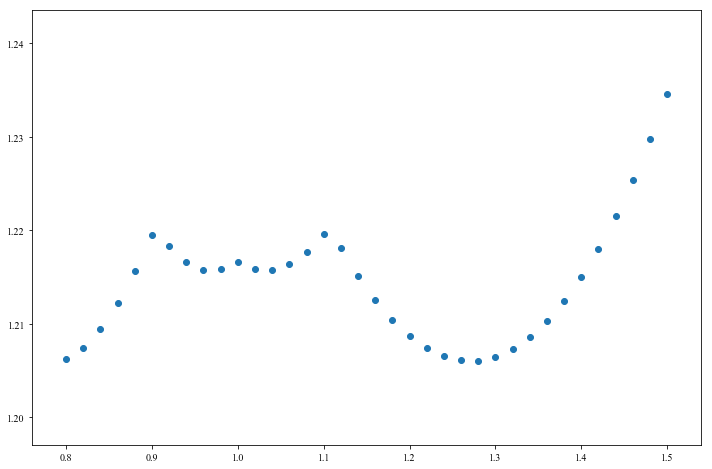

In [22]:
plt.figure(figsize=(12,8))
plt.scatter(aniso_df.loc[aniso_df['UCarea']==24]['aniso'],
            aniso_df.loc[aniso_df['UCarea']==24]['gap'])

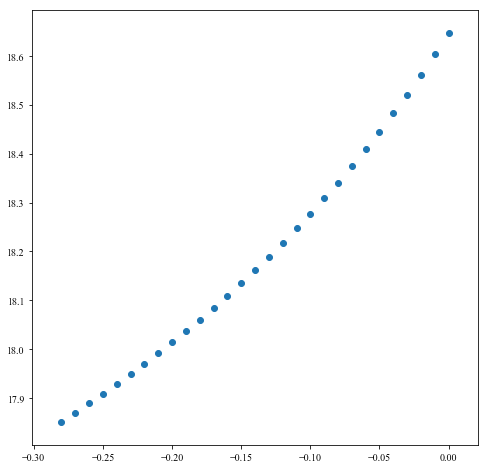

In [23]:
plt.figure(figsize=(8,8))
plt.scatter(rsquared_df.loc[rsquared_df['UCarea']==24]['t2'],
            rsquared_df.loc[rsquared_df['UCarea']==24]['gap'])

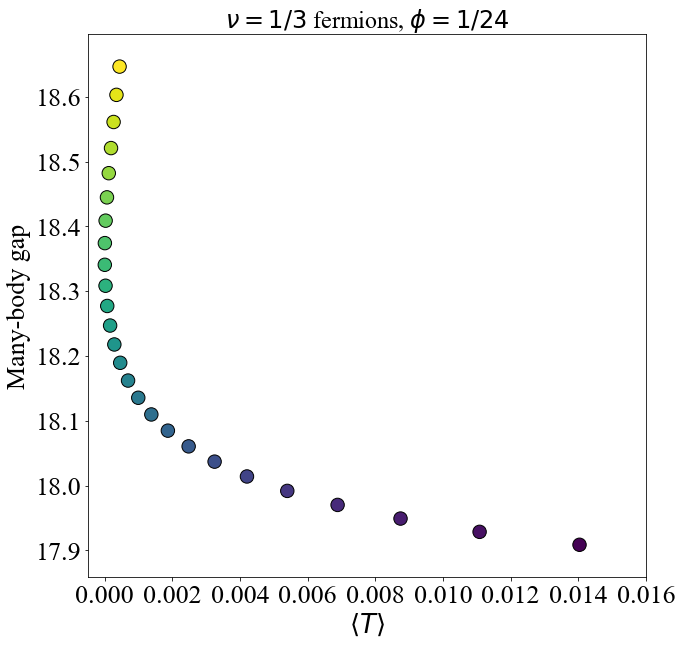

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['traceIneq'],
            rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['gap'],
            c=rsquared_full_df.loc[rsquared_full_df['UCarea']==24]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
#cbar=plt.colorbar()
#cbar.ax.set_title(r"$t_2$")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/24$",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-fermions-24-exponential.pdf",
            pad_inches=0,
            bbox_inches='tight')
#plt.ylim(1.215,1.2171)

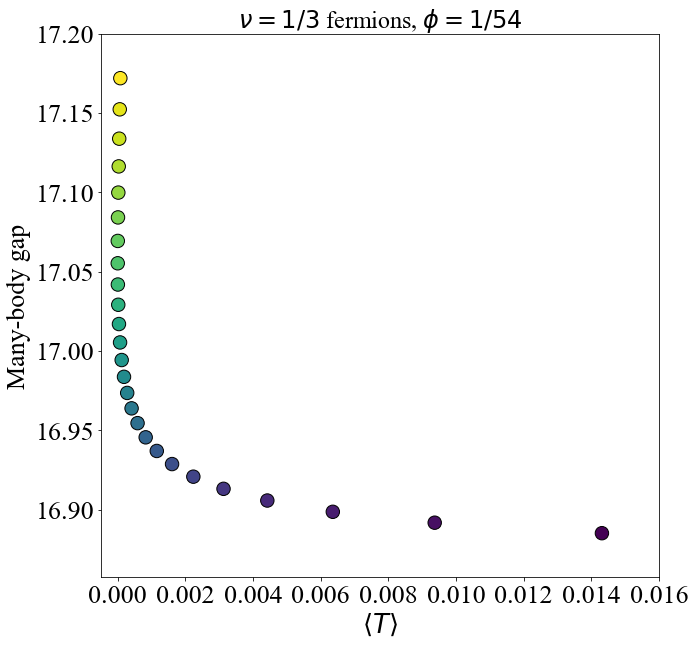

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(rsquared_full_df.loc[rsquared_full_df['UCarea']==54]['traceIneq'],
            rsquared_full_df.loc[rsquared_full_df['UCarea']==54]['gap'],
            c=rsquared_full_df.loc[rsquared_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
#cbar=plt.colorbar()
#cbar.ax.set_title(r"$t_2$")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/54$",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-fermions-54-exponential.pdf",
           pad_inches=0,
           bbox_inches='tight')
#plt.ylim(1.215,1.2171)

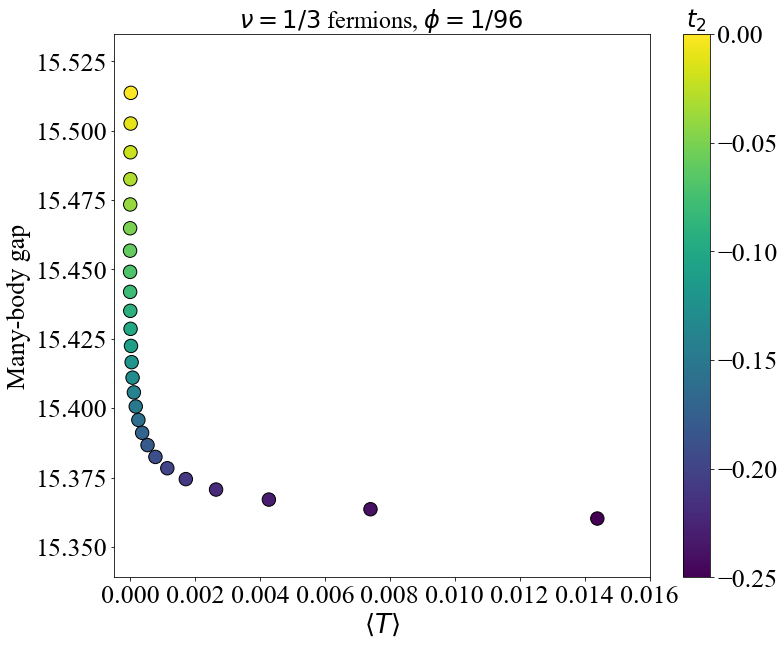

In [26]:
plt.figure(figsize=(12,10))
plt.scatter(rsquared_full_df.loc[rsquared_full_df['UCarea']==96]['traceIneq'],
            rsquared_full_df.loc[rsquared_full_df['UCarea']==96]['gap'],
            c=rsquared_full_df.loc[rsquared_full_df['UCarea']==96]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=180)
cbar=plt.colorbar()
cbar.ax.set_title(r"$t_2$",fontsize=24)
cbar.ax.tick_params(labelsize=26)
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/96$",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-fermions-96-exponential.pdf",
           pad_inches=0,
           bbox_inches='tight')
#plt.ylim(1.215,1.2171)

Text(0.5,1,'nu=1/3 fermions, phi=1/96, e^(-r^4) interaction')

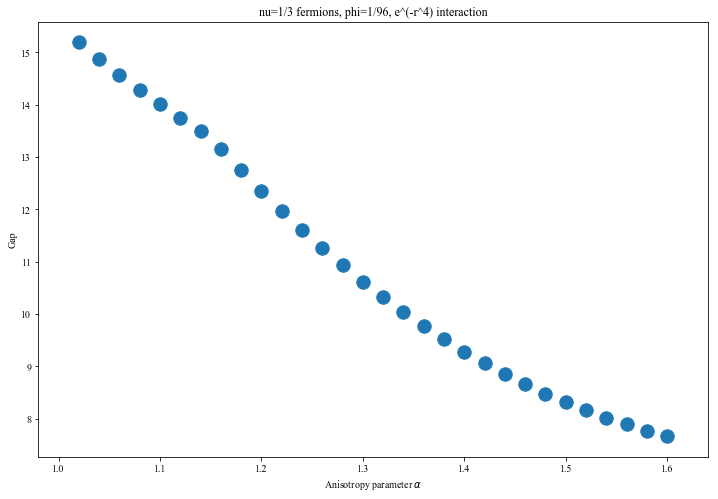

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(rsquared_aniso_df.loc[rsquared_aniso_df['UCarea']==96]['aniso'],
            rsquared_aniso_df.loc[rsquared_aniso_df['UCarea']==96]['gap'],s=180)
#cbar=plt.colorbar()
#cbar.ax.set_title("t2")
plt.xlabel(r"Anisotropy parameter $\alpha$")
plt.ylabel("Gap")
plt.title("nu=1/3 fermions, phi=1/96, e^(-r^4) interaction")
#plt.xlim(-0.0005,0.016)
#plt.ylim(1.215,1.2171)

Text(0.5,1,'$\\nu=1/3$ fermions, $\\phi=1/96$')

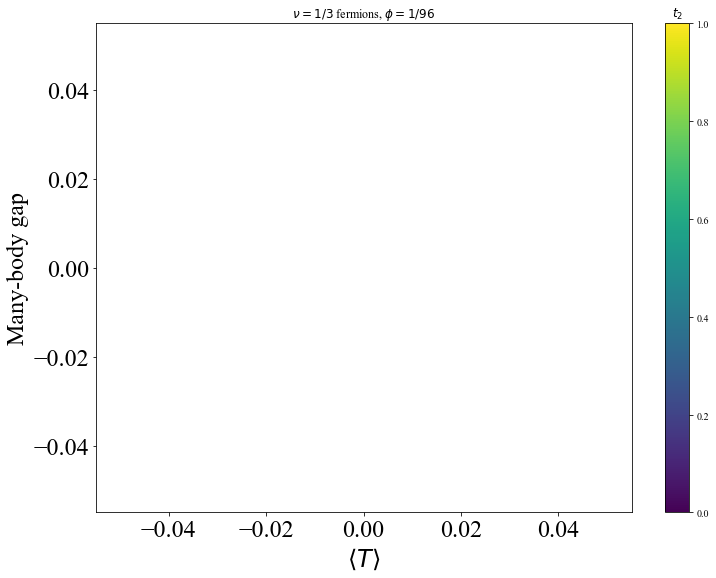

In [28]:
plt.figure(figsize=(12,9))
plt.scatter(rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==96]['traceIneq'],
            rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==96]['gap'],
            c=rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==96]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=80)
cbar=plt.colorbar()
cbar.ax.set_title(r"$t_2$")
plt.xlabel(r"$\langle T \rangle$",fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Many-body gap",fontsize=24)
plt.yticks(fontsize=24)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/96$")
#plt.xlim(-0.0005,0.016)
#plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-fermions-96-exponential.pdf",
#           pad_inches=0,
#           bbox_inches='tight')
#plt.ylim(1.215,1.2171)

Text(0.5,1,'$\\nu=1/3$ fermions, $\\phi=1/54$')

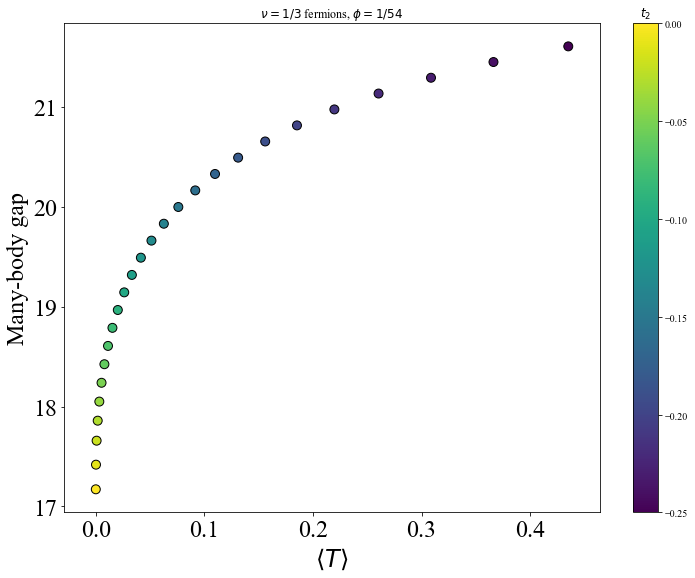

In [29]:
plt.figure(figsize=(12,9))
plt.scatter(rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==54]['traceIneq'],
            rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==54]['gap'],
            c=rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==54]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=80)
cbar=plt.colorbar()
cbar.ax.set_title(r"$t_2$")
plt.xlabel(r"$\langle T \rangle$",fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Many-body gap",fontsize=24)
plt.yticks(fontsize=24)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/54$")
#plt.xlim(-0.0005,0.016)
#plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-fermions-96-exponential.pdf",
#           pad_inches=0,
#           bbox_inches='tight')
#plt.ylim(1.215,1.2171)

Text(0.5,1,'$\\nu=1/3$ fermions, $\\phi=1/24$')

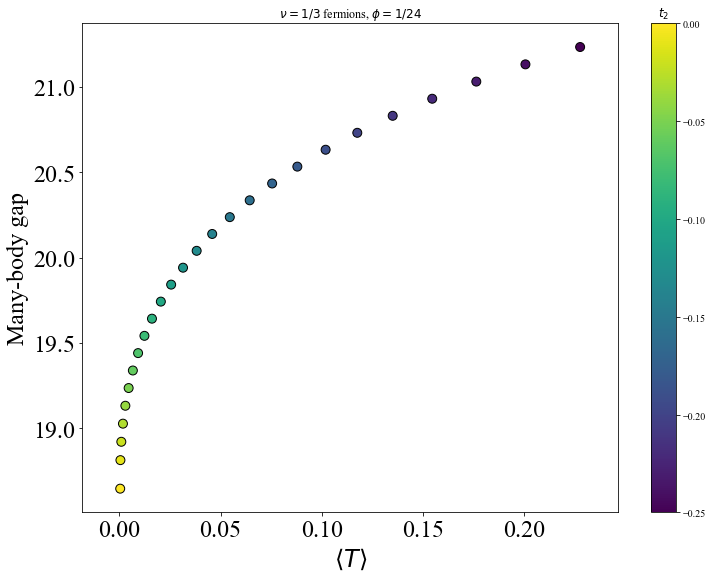

In [30]:
plt.figure(figsize=(12,9))
plt.scatter(rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==24]['traceIneq'],
            rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==24]['gap'],
            c=rsquared_mixed_full_df.loc[rsquared_mixed_full_df['UCarea']==24]['t2'],
           cmap=plt.cm.viridis,
           edgecolor='black',s=80)
cbar=plt.colorbar()
cbar.ax.set_title(r"$t_2$")
plt.xlabel(r"$\langle T \rangle$",fontsize=24)
plt.xticks(fontsize=24)
plt.ylabel("Many-body gap",fontsize=24)
plt.yticks(fontsize=24)
plt.title(r"$\nu=1/3$ fermions, $\phi=1/24$")
#plt.xlim(-0.0005,0.016)
#plt.savefig("/Users/dbauer/Dropbox/quartic/manuscript/gap-v-trace-fermions-96-exponential.pdf",
#           pad_inches=0,
#           bbox_inches='tight')
#plt.ylim(1.215,1.2171)